# PREDICTING CO2 EMISSION RATES OF VEHICLES

<img src="car_co2_image.jpg" />

# TABLE OF CONTENT
[1. Problem Statement](#Problem-Statement)

[2. Importing Python Libraries](#Importing-Python-Libraries)

[2. Importing data](#Data-Importation)

[3. Data Exploration & Cleaning](#Exploratory-Data-Analysis-and-Cleaning)

[4. Building Models](#Building-Models)

   * [RandomForest Regressor](#1.-RandomForestRegressor)
   
   * [SGD Regressor](#2.-SGDRegressor)
   
   * [KNeighbors Regressor](#3.-KNeighborsRegressor)
   * [DecisionTree Regressor](#4.-DecisionTreeRegressor)
   * [Voting Regressor](#5.-VotingRegressor)
   * [AdaBoostRegressor](#6.-AdaBoostRegressor)  
   * [GradientBoostingRegressor](#7.-GradientBoostingRegressor)
   * [BaggingRegressor](#8.-BaggingRegressor)
    
[6. Evaluating Models](#Results)

[7. Choice Model](#Choice-Model)

# Problem Statement
In the recent years, the canker of global warming has been worsened by the continual increase in the emission of Carbon dioxide into the atmosphere from various sources of which automobile vehicles are a part and this threaten the life of humans on earth.
This project seeks to predict the carbon dioxide emission rates of various vehicles based on vehicle properties such as fuel consumption rate, number of engine cylinders and other factors such as fuel type used.

# Importing Python Libraries

In [ ]:
pip install category_encoders

In [1]:
# Library for handling data and processing numbers
import pandas as pd
import numpy as np

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from category_encoders.target_encoder import TargetEncoder

# Reducing warning content
import warnings
warnings.filterwarnings("ignore")

# Data Importation

In [3]:
# Description of the content of the data
df_description = pd.read_csv('Data Description.csv')
df_description

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [4]:
# Importing the data
df=pd.read_csv('CO2 Emissions_Canada.csv')

In [5]:
df['number_of_gears']=np.where(df['Transmission'].str[:2].isin(['AM','AS','AV']),df['Transmission'].str[2:],
                               df['Transmission'].str[1:])
df['number_of_gears']=np.where(df['number_of_gears']=='',0,df['number_of_gears'])
df['number_of_gears']=df['number_of_gears'].astype('int')

In [6]:
df['Transmission']=np.where(df['Transmission'].str[:2].isin(['AM','AS','AV']),df['Transmission'].str[:2],
                               df['Transmission'].str[0])

In [7]:
df.drop(['Model','Fuel Consumption Comb (mpg)','Fuel Consumption City (L/100 km)',
         'Fuel Consumption Hwy (L/100 km)'],axis=1,inplace=True)

In [8]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [9]:
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),number_of_gears
0,ACURA,COMPACT,2.0,4,AS,Z,8.5,196,5
1,ACURA,COMPACT,2.4,4,M,Z,9.6,221,6
2,ACURA,COMPACT,1.5,4,AV,Z,5.9,136,7
3,ACURA,SUV - SMALL,3.5,6,AS,Z,11.1,255,6
4,ACURA,SUV - SMALL,3.5,6,AS,Z,10.6,244,6
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,2.0,4,AS,Z,9.4,219,8
7381,VOLVO,SUV - SMALL,2.0,4,AS,Z,9.9,232,8
7382,VOLVO,SUV - SMALL,2.0,4,AS,Z,10.3,240,8
7383,VOLVO,SUV - STANDARD,2.0,4,AS,Z,9.9,232,8


# Exploratory Data Analysis and Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Vehicle Class                     7385 non-null   object 
 2   Engine Size(L)                    7385 non-null   float64
 3   Cylinders                         7385 non-null   int64  
 4   Transmission                      7385 non-null   object 
 5   Fuel Type                         7385 non-null   object 
 6   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 7   CO2 Emissions(g/km)               7385 non-null   int64  
 8   number_of_gears                   7385 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 519.4+ KB


Data has only float,object and integer values.

In [11]:
df.shape

(7385, 9)

Original Data contains 7385 observations and 12 columns but has been reduced to 9 columns

In [12]:
df.isnull().values.any()

False

There are no missing values

In [13]:
#Dropping Duplicates
df.drop_duplicates(keep='first',inplace=True)
df.shape

(4867, 9)

After removing the duplicates, we are left with 4867 observations and 9 columns

In [14]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),number_of_gears
count,4867.000000,4867.000000,4867.000000,4867.000000,4867.000000
mean,3.127224,5.549209,10.965215,249.337169,6.575919
std,1.359576,1.834331,2.995194,59.580751,1.823303
min,0.900000,3.000000,4.100000,96.000000,0.000000
25%,2.000000,4.000000,8.800000,205.000000,6.000000
50%,3.000000,6.000000,10.500000,243.000000,6.000000
75%,3.700000,6.000000,12.600000,285.000000,8.000000
max,8.400000,16.000000,26.100000,522.000000,10.000000


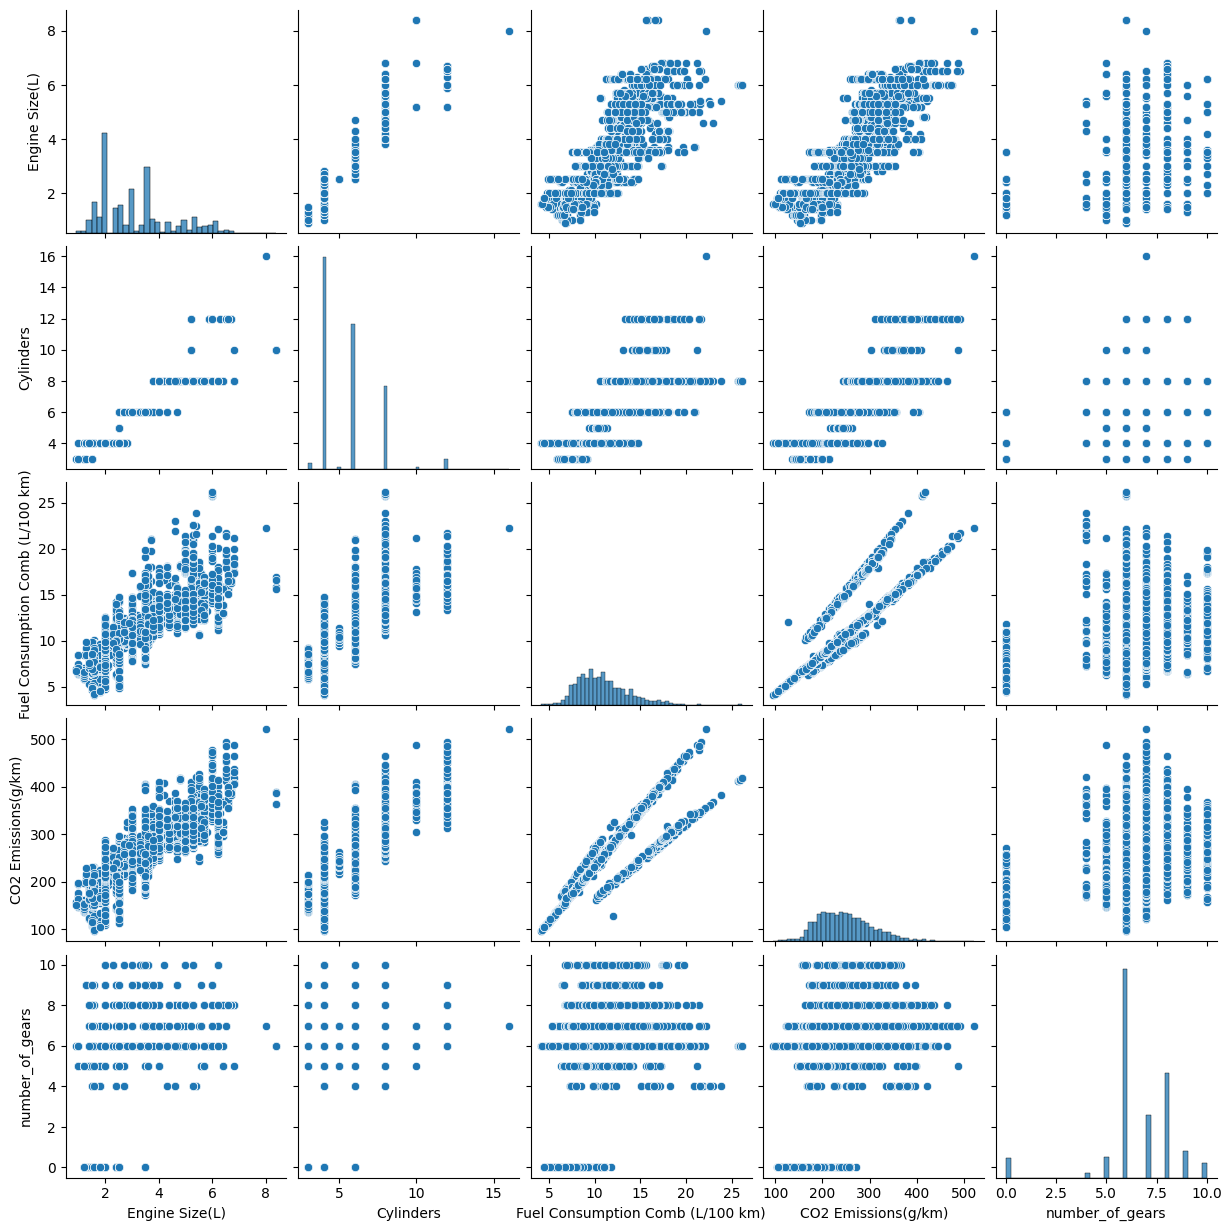

In [15]:
sns.pairplot(df)

Based on the pairplot above, it is noted that,

1. As engine size increases:

* fuel consumption (L/100km) increases
* the number of cylinders increases

2. CO2 Emissions generally increase with increase in all the features with the exception of 'Fuel Consumption Com (mpg)' where there is an inverse non-linear relationship

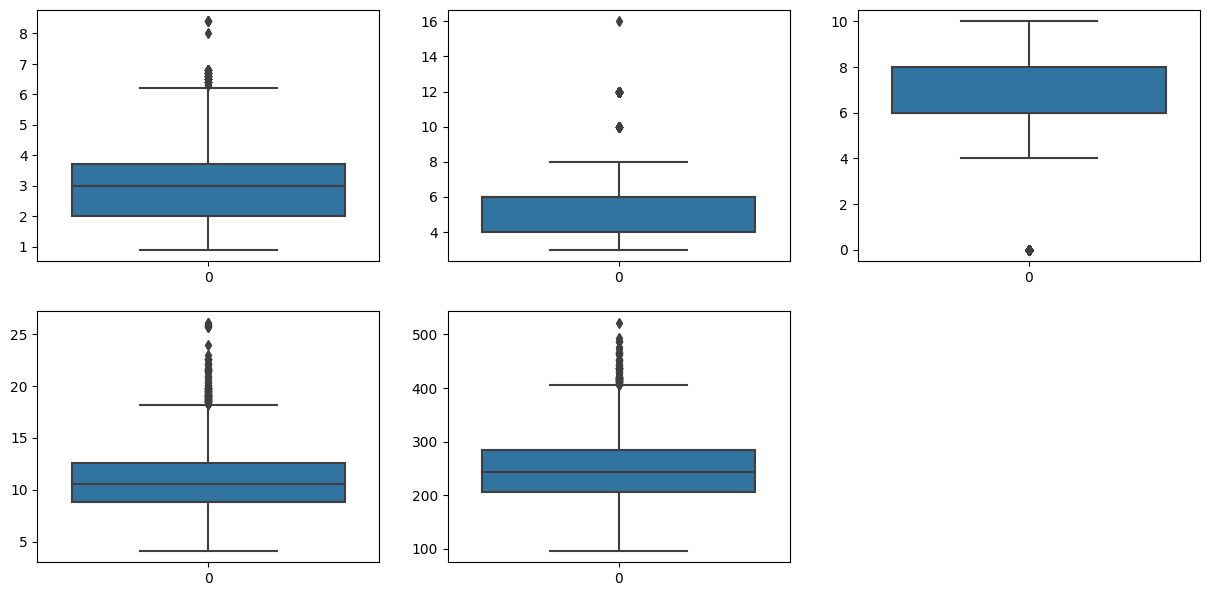

In [16]:
numeric_columns=['Engine Size(L)', 'Cylinders',
       'number_of_gears', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
j=1
fig = plt.figure(figsize = (15,15))
for i in numeric_columns:
    plt.subplot(4,3,j)
    sns.boxplot(df[i])
    j=j+1

The distribution of values in the various columns indicate the need for scaling features since there non-uniformly distributed values in a number of the columns

Text(0.5, 1.0, 'Correlation Heatmap')

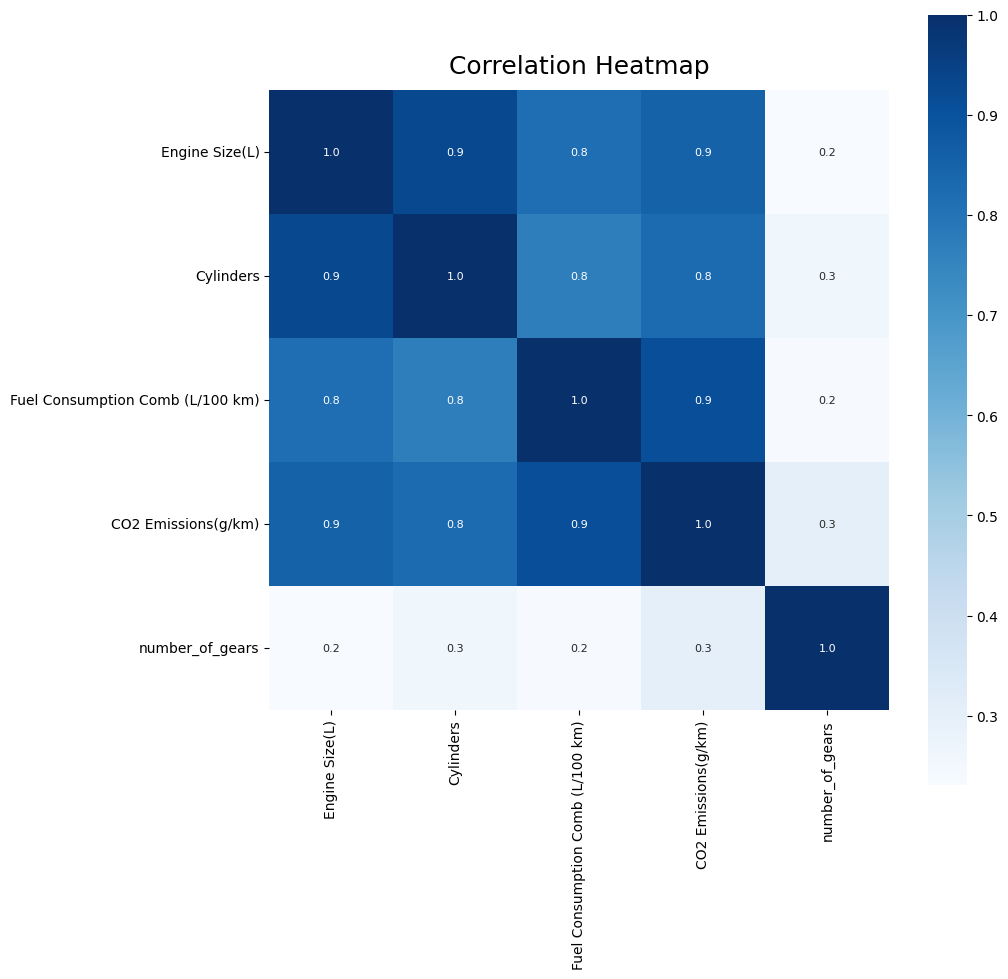

In [17]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [18]:
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),number_of_gears
0,ACURA,COMPACT,2.0,4,AS,Z,8.5,196,5
1,ACURA,COMPACT,2.4,4,M,Z,9.6,221,6
2,ACURA,COMPACT,1.5,4,AV,Z,5.9,136,7
3,ACURA,SUV - SMALL,3.5,6,AS,Z,11.1,255,6
4,ACURA,SUV - SMALL,3.5,6,AS,Z,10.6,244,6
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,2.0,4,AS,Z,9.4,219,8
7381,VOLVO,SUV - SMALL,2.0,4,AS,Z,9.9,232,8
7382,VOLVO,SUV - SMALL,2.0,4,AS,Z,10.3,240,8
7383,VOLVO,SUV - STANDARD,2.0,4,AS,Z,9.9,232,8


In [19]:
for i in df.columns:
    print(i,': ',df[i].nunique())
    print("\n")

Make :  42


Vehicle Class :  16


Engine Size(L) :  51


Cylinders :  8


Transmission :  5


Fuel Type :  5


Fuel Consumption Comb (L/100 km) :  181


CO2 Emissions(g/km) :  331


number_of_gears :  8




In [21]:
X=df.drop(['CO2 Emissions(g/km)'],axis=1)
y=df['CO2 Emissions(g/km)']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
train_df=pd.concat([X_train,y_train],axis=1)
test_df=pd.concat([X_test,y_test],axis=1)

In [24]:
test_df.to_csv('test.csv',index=False)

In [25]:
train_df.to_csv('train.csv',index=False)

In [30]:
sc=MinMaxScaler()
en = TargetEncoder()
encode = make_column_transformer((en, ['Make','Vehicle Class','Transmission','Fuel Type']), remainder='passthrough')

In [31]:
# Creating a RandomForestRegressor with scaling
rf=RandomForestRegressor(random_state=2)#n_estimators=100,max_depth=14,)
steps=[('enc',encode),('sc',sc),('rf',rf)]#('enc',encode),
rfscale=Pipeline(steps)
rfscale.fit(X_train,y_train)

Pipeline(steps=[('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['Make', 'Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type'])])),
                ('sc', MinMaxScaler()),
                ('rf', RandomForestRegressor(random_state=2))])

In [32]:
cv_scaled=cross_val_score(rfscale,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
score = -1 * cv_scaled.mean()
score ** 0.5

5.42461663326477

In [33]:
rfnew=RandomForestRegressor(random_state=2,max_depth=9)#,n_estimators=300)#,,,
                            #max_features=14)#,)#,)
rfpipe=Pipeline(steps=[('enc',encode),('sc',sc),('rfnew',rfnew)])
params=dict(rfnew__n_estimators= list(range(5,500,2)))#,
#            rfnew__max_features=['sqrt','log2',None],rfnew__max_leaf_nodes=list(range(2,12)))

In [35]:
rcv=RandomizedSearchCV(rfpipe,params,scoring='neg_mean_squared_error',cv=10,n_iter=150)
rcv.fit(X_train,y_train)
rcv.best_estimator_.get_params()

{'memory': None,
 'steps': [('enc', ColumnTransformer(remainder='passthrough',
                     transformers=[('targetencoder', TargetEncoder(),
                                    ['Make', 'Vehicle Class', 'Transmission',
                                     'Fuel Type'])])),
  ('sc', MinMaxScaler()),
  ('rfnew', RandomForestRegressor(max_depth=9, random_state=2))],
 'verbose': False,
 'enc': ColumnTransformer(remainder='passthrough',
                   transformers=[('targetencoder', TargetEncoder(),
                                  ['Make', 'Vehicle Class', 'Transmission',
                                   'Fuel Type'])]),
 'sc': MinMaxScaler(),
 'rfnew': RandomForestRegressor(max_depth=9, random_state=2),
 'enc__n_jobs': None,
 'enc__remainder': 'passthrough',
 'enc__sparse_threshold': 0.3,
 'enc__transformer_weights': None,
 'enc__transformers': [('targetencoder',
   TargetEncoder(),
   ['Make', 'Vehicle Class', 'Transmission', 'Fuel Type'])],
 'enc__verbose': False,
 'enc__

In [36]:
rf_final1= RandomForestRegressor(random_state=2,n_estimators=100,max_depth=9)#,
                            #max_features=None)#,max_depth=14,)#,n_estimators=1708)
rffinal=Pipeline(steps=[('enc',encode),('sc',sc),('rffinal',rf_final1)])
rffinal.fit(X_train,y_train)

Pipeline(steps=[('enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['Make', 'Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type'])])),
                ('sc', MinMaxScaler()),
                ('rffinal',
                 RandomForestRegressor(max_depth=9, random_state=2))])

In [37]:
score = cross_val_score(rffinal,X_test,y_test,cv=10,scoring='neg_mean_squared_error')
mse =-1 * score.mean()
mse ** 0.5

5.359147697996795

In [38]:
import pickle

In [39]:
pickle.dump(rffinal,open('co2_predictor.pkl','wb'))